In [31]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


This tutorial is from https://www.tensorflow.org/tutorials/keras/classification, its very helpful

In [32]:
# Here we are using functions made by tensorflow to easily import this practice data set of fashion pics

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
train_images = train_images / 255.0
test_images = test_images / 255.0

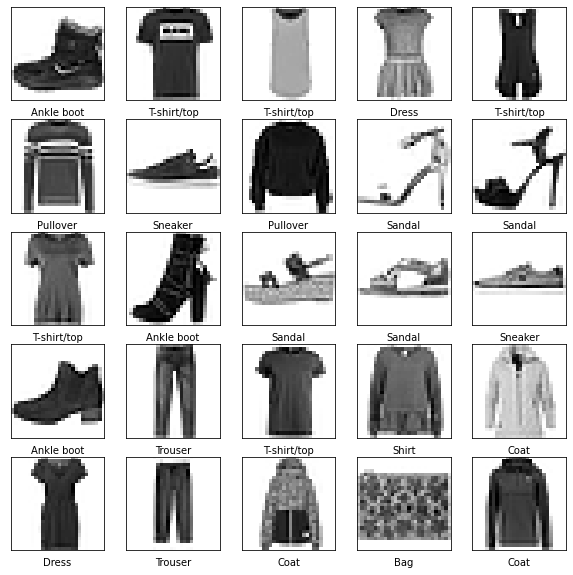

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Transforms 28x28 images to a 1d array of 784 length
    tf.keras.layers.Dense(128, activation='relu'), #Basically where the learning happens
    tf.keras.layers.Dense(10) #Output a number of one of the 10 classes listed earlier
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs=10) #Train the model

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4895 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3774 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3144 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2821 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2696 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2480 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3532 - accuracy: 0.8774 - 479ms/epoch - 2ms/step

Test accuracy: 0.8773999810218811


In [40]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [41]:
# This shows the probability that the model assigns each image
predictions[0]

array([3.1630022e-06, 2.9374834e-07, 1.6783422e-05, 3.6077465e-09,
       1.3168326e-08, 4.8264582e-04, 1.7102232e-06, 4.1781846e-02,
       2.1484162e-05, 9.5769209e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

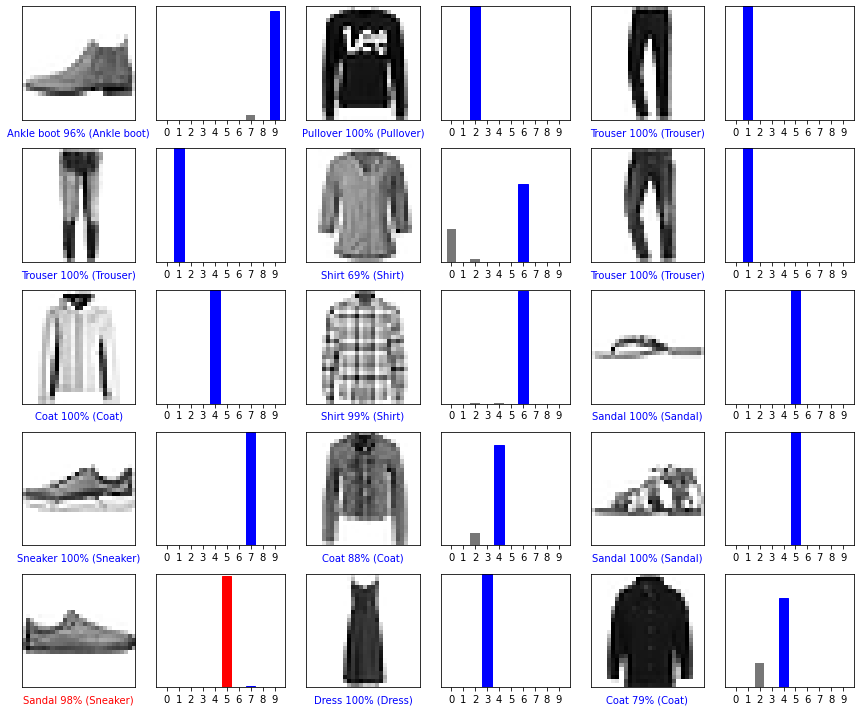

In [61]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 19ms/step
[[1.2702111e-04 3.1138005e-11 9.9916184e-01 6.0647584e-15 7.0658431e-04
  3.2428732e-10 4.5537445e-06 9.0060910e-12 7.1776076e-13 2.4582335e-12]]


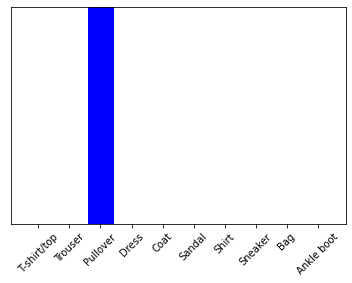

In [64]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()